# Dekompozycja spektralna
## Laboratorium 7 - Metody Obliczeniowe w Nauce i Technice

In [58]:
import numpy as np
import scipy.linalg as salg
import matplotlib.pyplot as plt
import time
from functools import reduce

## Zadanie 1. Metoda potęgowa.

Napisz funkcję obliczającą metodą potęgową dominującą wartość własną (największą co do modułu) i odpowiadający jej wektor własny dla danej macierzy rzeczywistej syme-trycznej. Sprawdź poprawność działania programu porównując własną implementacjęz wynikami funkcji bibliotecznej. Przedstaw na wykresie zależność czasu obliczeń odrozmiaru macierzy (rozmiary macierzy 100x100, 500x500, ...).

In [53]:
def vector_eps(v, eps=10**-6):      
    for i in range(len(v)):
        if abs(v[i][0]) > eps:
            return False
    return True

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def method(A, max_iter):
    x = np.full((len(A), 1), 1)
    for _ in range(max_iter):
        x = np.matmul(A, x)
        x /= x.max()
        
        if vector_eps(x):
            break
    x = normalize(x)
    return x.max(), x

### Sprawdzenie poprawności algorytmu

In [51]:
A = np.array([
    [1, 2, 3],
    [3, 2, 1],
    [3.5, 2, 4]
])

In [54]:
method(np.copy(A), 1000)

(0.7633314241108896,
 array([[0.49218099],
        [0.41842921],
        [0.76333142]]))

In [55]:
np.linalg.eig(np.copy(A))

(array([ 7.35305455, -1.56761768,  1.21456313]),
 array([[-0.49218099, -0.77194172,  0.03211624],
        [-0.41842921,  0.57055132, -0.83055941],
        [-0.76333142,  0.28031619,  0.55600326]]))

### Porównanie czasowe dla losowych macierzy $n \times n$, $n = 2, 3, ..., 512$ z maksymalną liczbą iteracji równą $1000$

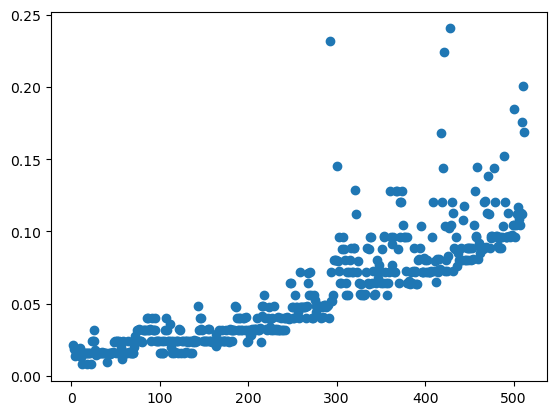

In [60]:
def render_time_plot():
    ns = np.array([n for n in range(2, 513)])
    times = np.empty(ns[len(ns) - 1] - ns[0] + 1)

    for n in ns:
        start = time.time()
        A = np.random.rand(n, n)
        method(A, 1000)
        times[n - ns[0]] = time.time() - start
    
    fig, ax = plt.subplots()
    ax.scatter(ns, times)
    plt.show()

render_time_plot()

## Zadanie 2. Odwrotna metoda potęgowa.

In [57]:
def reverse_method(A, sigma):
    P, L, U = scipy.linalg.lu(A)